In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [2]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
troca = {
    'yes' : 1,
    'no' : 0
}
dados['Vendido'] = dados.sold.map(troca)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,Vendido
0,0,21801,2000,30941.02,yes,1
1,1,7843,1998,40557.96,yes,1
2,2,7109,2006,89627.50,no,0
3,3,26823,2015,95276.14,no,0
4,4,7935,2014,117384.68,yes,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_carro'] = ano_atual - dados.model_year
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,Vendido,idade_carro
0,0,21801,2000,30941.02,yes,1,23
1,1,7843,1998,40557.96,yes,1,25
2,2,7109,2006,89627.50,no,0,17
3,3,26823,2015,95276.14,no,0,8
4,4,7935,2014,117384.68,yes,1,9


In [5]:
dados['Kilometragem_por_ano'] = dados['mileage_per_year'] * 1.60934
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,Vendido,idade_carro,Kilometragem_por_ano
0,0,21801,2000,30941.02,yes,1,23,35085.22134
1,1,7843,1998,40557.96,yes,1,25,12622.05362
2,2,7109,2006,89627.50,no,0,17,11440.79806
3,3,26823,2015,95276.14,no,0,8,43167.32682
4,4,7935,2014,117384.68,yes,1,9,12770.11290


In [6]:
dados.drop( columns = ['Unnamed: 0', 'mileage_per_year', 'model_year', 'sold' ], inplace = True)
dados.rename( columns = {"price" : "Valor"}, inplace = True)
dados.head()

,Valor,Vendido,idade_carro,Kilometragem_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

x = dados[['idade_carro', 'Valor', 'Kilometragem_por_ano']]
y = dados['Vendido']

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
model = LinearSVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) *100

print("A acuracia foi de %.2f%%" %acuracia)

A acuracia foi de 46.88%


C:\Users\cat13\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.dummy import DummyClassifier
dummy_statified = DummyClassifier(strategy='stratified')
dummy_statified.fit(treino_x,treino_y)
previsoes_dummy = dummy_statified.predict(teste_x)

acuracia_baseline = accuracy_score(teste_y, previsoes_dummy) *100

print("A baseline do dummy stratified foi de %.2f%%" %acuracia_baseline)

A baseline do dummy stratified foi de 52.44%


In [20]:
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x,treino_y)
previsoes_dummy = dummy_most_frequent.predict(teste_x)

acuracia_baseline = accuracy_score(teste_y, previsoes_dummy) *100

print("A baseline do dummy most frequent foi de %.2f%%" %acuracia_baseline)



A baseline do dummy most frequent foi de 58.00%


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

## SVC nao explica critérios para decisao

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

x = dados[['idade_carro', 'Valor', 'Kilometragem_por_ano']]
y = dados['Vendido']

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
model = DecisionTreeClassifier(max_depth = 3)
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) *100

print("A acuracia foi de %.2f%%" %acuracia)

A acuracia foi de 79.28%


'apt-get' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


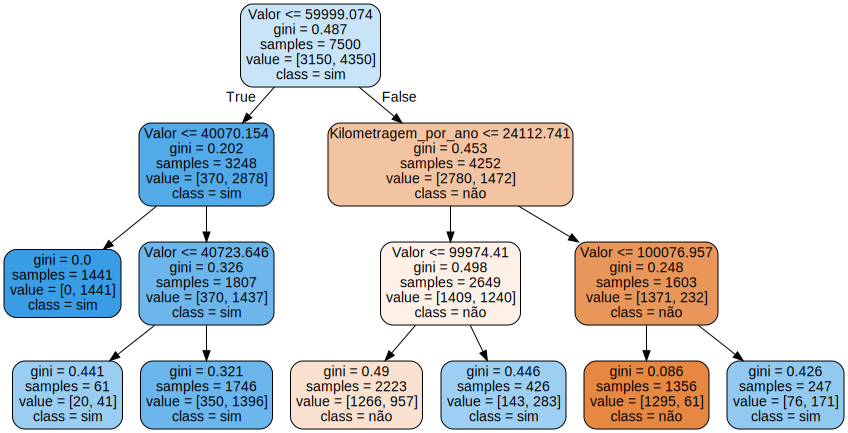

In [49]:
from sklearn.tree import export_graphviz
features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           feature_names = features, 
                          filled = True, rounded = True,
                          class_names = ['não', "sim"])
grafico = graphviz.Source(dot_data)
grafico

<AxesSubplot: xlabel='Valor', ylabel='Kilometragem_por_ano'>

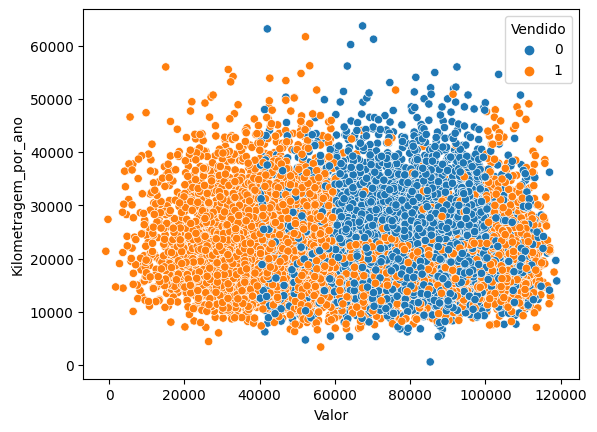

In [22]:
import seaborn as sns
sns.scatterplot(data = dados, y = 'Kilometragem_por_ano', x = 'Valor', hue = 'Vendido')
